# Plotting a sequence-similarity clustermap

This notebook shows how to display patterns of TCR sequence similarity in a hierarchically clustered heatmap.

The example data is from [Dash et al. Nature 2017](https://doi.org/10.1038/nature22383).

In [1]:
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp

In [2]:
!wget https://raw.githubusercontent.com/kmayerb/tcrdist3/master/dash_human.csv -O dash_human.csv > /dev/null 2>&1

## Default plot

The plot below is performed with default parameters, but the package provides extensive support for customization.

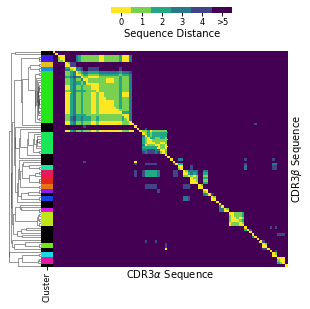

In [3]:
d = pd.read_csv('dash_human.csv')
epitope = 'BMLF'
cg, linkage, cluster = rsp.similarity_clustermap(d[d['epitope']==epitope],
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa')

Caption: Sequence-similarity clustermap of TCRs binding to an Epstein-Barr Virus epitope as obtained by single cell TCR sequencing following tetramer sorting. Lower/upper triangle shows pairwise distances of CDR3$\alpha$/CDR3$\beta$ sequences. Sequences are ordered by average linkage hierarchical clustering based on summed $\alpha\beta$ distance. The column on the left shows cluster assignment; sequences not belonging to a cluster based on a cutoff distance of 6 are shown in black.

## Customizations

By default the sequences are not displayed to keep the plot uncluttered. Here we show how to modify the plot to display the sequences, which can be useful particularly in very small samples

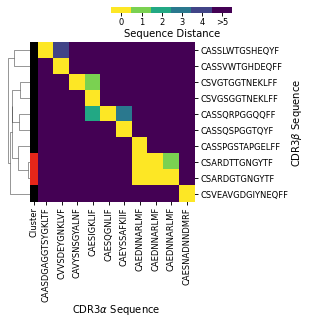

In [4]:
dsample = d[d['epitope']==epitope].sample(10)
cg, linkage, cluster = rsp.similarity_clustermap(dsample,
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa',
                                                 xticklabels=dsample['cdr3_a_aa'],
                                                 yticklabels=dsample['cdr3_b_aa'])

Plotting metadata columns alongside the sequence similarity clustermap can help identify drivers of sequence clustering. For example, this visualization helps highlight which clusters consist of sequences from across individuals, or whether V and J gene usage is uniform within a cluster.

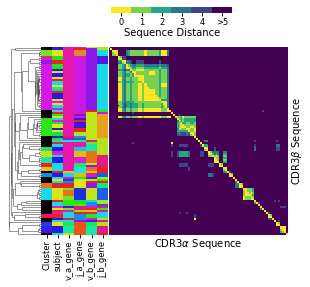

In [9]:
cg, linkage, cluster = rsp.similarity_clustermap(d[d['epitope']==epitope],
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa',
                                                 meta_columns=['subject',
                                                               'v_a_gene', 'j_a_gene',
                                                               'v_b_gene', 'j_b_gene'],
                                                 figsize=(4.2, 3.9))

Further customization of the metadata column colors and labels:

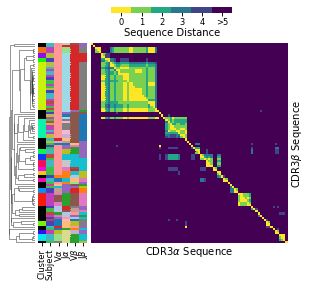

In [10]:
subject_color_mapper = lambda labels, **kwargs: rsp.labels_to_colors_hls(labels,
                                                                         palette_kws=dict(l=0.5, s=0.5),
                                                                         **kwargs)
cluster_color_mapper = lambda labels, **kwargs: rsp.labels_to_colors_hls(labels,
                                                                         palette_kws=dict(l=0.5, s=0.9),
                                                                         **kwargs)
cg, linkage, cluster = rsp.similarity_clustermap(d[d['epitope']==epitope],
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa',
                                                 meta_columns=dict(subject='Subject',
                                                                   v_a_gene=r'V$\alpha$',
                                                                   j_a_gene=r'J$\alpha$',
                                                                   v_b_gene=r'V$\beta$',
                                                                   j_b_gene=r'J$\beta$'),
                                                 meta_to_colors=[cluster_color_mapper, subject_color_mapper,
                                                                rsp.labels_to_colors_tableau,
                                                                rsp.labels_to_colors_tableau,
                                                                rsp.labels_to_colors_tableau,
                                                                rsp.labels_to_colors_tableau],
                                                colors_ratio=0.03, dendrogram_ratio=0.1,
                                                figsize=(4.2, 3.9))